## 12-data-assertions

### Soil Data Assertions

In [ ]:
# import packages
import pandas as pd
import janitor
import numpy as np

In [ ]:
# read data files and clean names

# archaeological soil samples
# this is the set of example soil particles
soil_data = pd.read_csv('data_raw/archaeological_soil_data.csv', sep = ',', skiprows=[1]).clean_names()

# lithic experimental samples
# this is the set of example stone particles
stone_data = pd.read_csv('data_raw/lithic_experimental_data.csv', sep = ',', skiprows=[1]).clean_names()

In [ ]:
# print the numerical variable
soil_data_numerical = soil_data.select_dtypes(include = [np.number])
# store these variables' name into a list for deeper assertion
soil_data_numerical_name = list(soil_data_numerical)
soil_data_numerical # There are 41 variables are numerical.

,id,img_id,da,dp,fwidth,flength,fthickness,elength,ethickness,ewidth,...,w_l_ratio,w_t_ratio,t_w_ratio,chull_surface_area,sieve,angularity,ellipticity,fiber_length,fiber_width,krumbein_rnd
0,25611,10977,13.303,15.911,12.651,17.110,11.317,15.814,11.309,12.542,...,0.739,1.118,0.895,599.801,11.984,28.000,1.398,17.259,8.683,0.192
1,48302,15470,12.578,16.192,12.966,16.210,11.119,14.483,11.091,13.021,...,0.800,1.166,0.858,550.880,12.042,37.366,1.306,24.508,5.025,0.178
2,32915,12616,12.534,16.888,11.852,16.679,9.440,16.400,9.584,11.033,...,0.711,1.255,0.797,563.687,10.646,33.278,1.711,23.274,4.844,0.209
3,22866,10293,12.242,16.833,12.716,17.865,10.748,15.674,10.197,12.019,...,0.712,1.183,0.845,526.194,11.732,45.047,1.537,29.682,3.588,0.168
4,10277,7209,11.012,13.255,8.301,15.206,8.301,15.127,8.187,8.187,...,0.546,1.000,1.000,406.845,8.301,25.041,1.848,13.992,6.806,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73308,56682,19419,0.037,0.089,0.019,0.135,0.019,0.044,0.016,0.016,...,0.145,1.000,1.000,0.006,0.019,0.000,2.705,0.000,0.000,1.000
73309,71921,26912,0.035,0.064,0.036,0.080,0.036,0.077,0.015,0.015,...,0.447,1.000,1.000,0.007,0.036,85.000,5.253,0.000,0.000,1.000
73310,64014,24046,0.035,0.073,0.039,0.087,0.039,0.092,0.018,0.018,...,0.448,1.000,1.000,0.009,0.039,0.000,4.990,0.000,0.000,1.000
73311,67033,25158,0.029,0.075,0.040,0.084,0.040,0.095,0.024,0.024,...,0.481,1.000,1.000,0.008,0.040,113.333,3.906,0.000,0.000,1.000


In [ ]:
# Define the function to judge whether data of an array is numerical.
def is_array_number(dtype):
    if np.issubdtype(dtype, np.integer):
        return True

    if np.issubdtype(dtype, np.floating):
        return True

    return False

In [ ]:
# use for loop and assert function to check if all data of the 41 variables is numerical,
# and the function will raise an error once there is a non-numerical value.
for i in list(soil_data_numerical_name):
    assert is_array_number(soil_data[[i]].values.dtype), 'The are string values in the dataset'

In [ ]:
# use for loop and assert function to check if all data of the 41 variables is not negative,
# and the function will raise an error once there is a negative value.
for i in list(soil_data_numerical_name):
    assert (soil_data[['id']].values >= 0).all(), 'The are negative values in the dataset'

In [ ]:
# print data that is not numerical
soil_data.select_dtypes(include = [object])

,filter0,filter1,filter2,filter3,filter4,filter5,filter6
0,Reject,Reject,Reject,Reject,Reject,Reject,Reject
1,Reject,Reject,Reject,Reject,Reject,Reject,Reject
2,Reject,Reject,Reject,Reject,Reject,Reject,Reject
3,Reject,Reject,Reject,Reject,Reject,Reject,Reject
4,Reject,Reject,Reject,Reject,Reject,Reject,Reject
...,...,...,...,...,...,...,...
73308,Reject,Reject,Reject,Reject,Reject,Reject,Reject
73309,Reject,Reject,Reject,Reject,Reject,Reject,Reject
73310,Reject,Reject,Reject,Reject,Reject,Reject,Reject
73311,Reject,Reject,Reject,Reject,Reject,Reject,Reject


                 da            dp        fwidth      flength    fthickness  \
count  73313.000000  73313.000000  73313.000000  73313.00000  73313.000000   
mean       0.231986      0.284808      0.183764      0.36165      0.170072   
std        0.376004      0.467939      0.372174      0.57519      0.292985   
min        0.024000      0.058000      0.019000      0.07400      0.019000   
25%        0.152000      0.166000      0.112000      0.18700      0.112000   
50%        0.174000      0.197000      0.137000      0.24300      0.135000   
75%        0.236000      0.283000      0.179000      0.36700      0.173000   
max       13.303000     16.888000     12.966000     17.86500     11.317000   

            elength  
count  73313.000000  
mean       0.360535  
std        0.581504  
min        0.041000  
25%        0.175000  
50%        0.232000  
75%        0.365000  
max       16.400000  


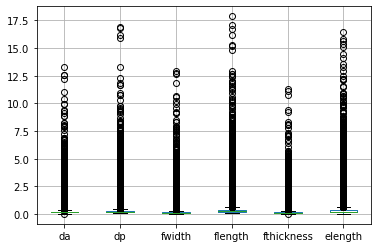

In [ ]:
# outlier detection (from variable 'da' to 'elength')
soil_data_numerical.iloc[:,2:8].boxplot()
print(soil_data_numerical.iloc[:,2:8].describe())

             ewidth        volume          area     perimeter    chull_area  \
count  73313.000000  73313.000000  73313.000000  73313.000000  73313.000000   
mean       0.177981      0.429839      0.153318      0.894744      0.168385   
std        0.360868     11.821718      1.757901      1.470069      1.917235   
min        0.014000      0.000000      0.000000      0.183000      0.001000   
25%        0.107000      0.001000      0.018000      0.520000      0.018000   
50%        0.131000      0.002000      0.024000      0.620000      0.024000   
75%        0.173000      0.006000      0.044000      0.890000      0.046000   
max       13.021000   1282.697000    138.982000     53.054000    149.950000   

       chull_perimeter  
count     73313.000000  
mean          0.878655  
std           1.370493  
min           0.183000  
25%           0.520000  
50%           0.618000  
75%           0.885000  
max          45.259000  


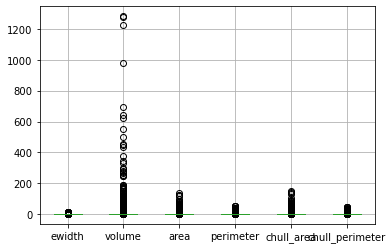

In [ ]:
# outlier detection (from variable 'ewidth' to 'chull_perimeter')
soil_data_numerical.iloc[:,9:15].boxplot()
print(soil_data_numerical.iloc[:,9:15].describe())

          l_t_ratio  t_l_aspect_ratio   compactness     roundness  \
count  73313.000000      73313.000000  73313.000000  73313.000000   
mean       2.220883          0.522858      0.686378      0.487069   
std        1.064239          0.174829      0.126418      0.167032   
min        1.041000          0.062000      0.141000      0.020000   
25%        1.555000          0.398000      0.605000      0.366000   
50%        1.903000          0.526000      0.702000      0.493000   
75%        2.512000          0.643000      0.773000      0.597000   
max       16.258000          0.961000      0.969000      0.938000   

       ellipse_ratio  
count   73313.000000  
mean        0.533611  
std         0.200962  
min         0.046000  
25%         0.384000  
50%         0.557000  
75%         0.667000  
max         1.000000  


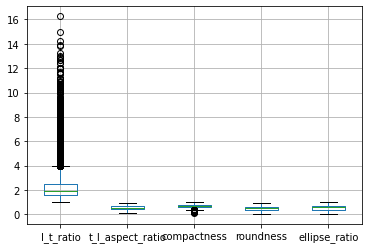

In [ ]:
# outlier detection (from variable 'l_t_ratio' to 'ellipse_ratio')
soil_data_numerical.iloc[:,16:21].boxplot()
print(soil_data_numerical.iloc[:,16:21].describe())

           solidity     concavity     convexity        extent     hash  \
count  73313.000000  73313.000000  73313.000000  73313.000000  73313.0   
mean       0.958334      0.041666      0.994073      0.734823      0.0   
std        0.074017      0.074017      0.015326      0.099227      0.0   
min        0.167000      0.000000      0.535000      0.118000      0.0   
25%        0.959000      0.004000      0.996000      0.697000      0.0   
50%        0.983000      0.017000      0.998000      0.743000      0.0   
75%        0.996000      0.041000      1.000000      0.784000      0.0   
max        1.000000      0.833000      1.000000      2.240000      0.0   

       transparency  
count  73313.000000  
mean       0.258064  
std        0.172110  
min        0.000000  
25%        0.000000  
50%        0.318000  
75%        0.374000  
max        0.894000  


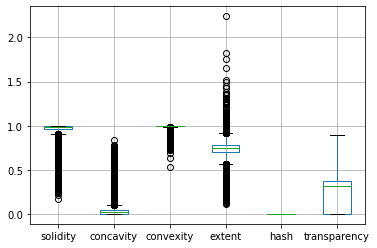

In [ ]:
# outlier detection (from variable 'solidity' to 'transparency')
soil_data_numerical.iloc[:,22:28].boxplot()
print(soil_data_numerical.iloc[:,22:28].describe())

       surface_area     l_w_ratio     w_l_ratio     w_t_ratio     t_w_ratio  \
count  73313.000000  73313.000000  73313.000000  73313.000000  73313.000000   
mean       0.613250      2.168756      0.537299      1.032428      0.978484   
std        7.031607      1.053205      0.179893      0.135499      0.078574   
min        0.002000      1.041000      0.062000      1.000000      0.172000   
25%        0.073000      1.500000      0.410000      1.000000      1.000000   
50%        0.095000      1.839000      0.544000      1.000000      1.000000   
75%        0.175000      2.441000      0.667000      1.000000      1.000000   
max      555.926000     16.258000      0.961000      5.830000      1.000000   

       chull_surface_area  
count        73313.000000  
mean             0.673543  
std              7.668940  
min              0.006000  
25%              0.073000  
50%              0.098000  
75%              0.185000  
max            599.801000  


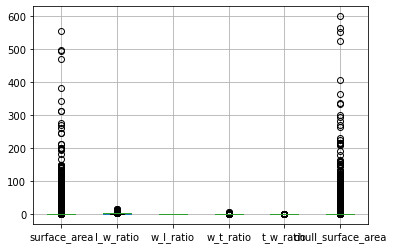

In [ ]:
# outlier detection (from variable 'surface_area' to 'chull_surface_area')
soil_data_numerical.iloc[:,29:35].boxplot()
print(soil_data_numerical.iloc[:,29:35].describe())

         angularity   ellipticity  fiber_length   fiber_width  krumbein_rnd
count  73313.000000  73313.000000  73313.000000  73313.000000  73313.000000
mean      53.778604      2.296649      0.273778      0.101909      0.980909
std       35.364862      1.350226      0.764155      0.326652      0.081564
min        0.000000      1.000000      0.000000      0.000000      0.168000
25%        0.000000      1.500000      0.000000      0.000000      1.000000
50%       68.000000      1.794000      0.092000      0.016000      1.000000
75%       85.000000      2.605000      0.298000      0.123000      1.000000
max      132.500000     21.898000     29.682000      8.959000      1.000000


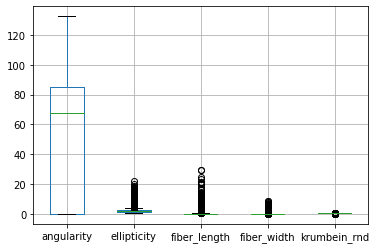

In [ ]:
# outlier detection (from variable 'angularity' to 'krumbein_rnd')
soil_data_numerical.iloc[:,36:41].boxplot()
print(soil_data_numerical.iloc[:,36:41].describe())

### Stone Data Assertions

In [ ]:
# print the numerical variable
stone_data_numerical = stone_data.select_dtypes(include = [np.number])
# store these variables' name into a list for deeper assertion
stone_data_numerical_name = list(stone_data_numerical)
stone_data_numerical # There are 41 variables are numerical.

,id,img_id,da,dp,fwidth,flength,fthickness,elength,ethickness,ewidth,...,w_l_ratio,w_t_ratio,t_w_ratio,chull_surface_area,sieve,angularity,ellipticity,fiber_length,fiber_width,krumbein_rnd
0,104,10708,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,...,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214
1,19,5682,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,...,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214
2,14,4826,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,...,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219
3,1,2812,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,...,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251
4,83,9441,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,...,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,4469,16993,0.040,0.118,0.071,0.141,0.071,0.041,0.024,0.024,...,0.500,1.000,1.000,0.020,0.071,120.000,1.732,0.178,0.007,1.000
5295,17,4867,0.040,0.086,0.045,0.112,0.045,0.041,0.024,0.024,...,0.400,1.000,1.000,0.010,0.045,110.000,1.732,0.125,0.010,1.000
5296,5194,18045,0.040,0.099,0.035,0.141,0.035,0.041,0.024,0.024,...,0.250,1.000,1.000,0.010,0.035,87.500,1.732,0.147,0.008,1.000
5297,5196,18046,0.040,0.099,0.035,0.141,0.035,0.041,0.024,0.024,...,0.250,1.000,1.000,0.010,0.035,116.667,1.732,0.147,0.008,1.000


In [ ]:
# use for loop and assert function to check if all data of the 41 variables is numerical,
# and the function will raise an error once there is a non-numerical value.
for i in list(stone_data_numerical_name):
    assert is_array_number(stone_data[[i]].values.dtype), 'The are string values in the dataset'

In [ ]:
# use for loop and assert function to check if all data of the 41 variables is not negative,
# and the function will raise an error once there is a negative value.
for i in list(stone_data_numerical_name):
    assert (stone_data[['id']].values >= 0).all(), 'The are negative values in the dataset'

In [ ]:
# print data that is not numerical
stone_data.select_dtypes(include = [object])

,filter0,filter1,filter2,filter3,filter4,filter5,filter6
0,Reject,Reject,Reject,Reject,Reject,Reject,Reject
1,Reject,Reject,Reject,Reject,Reject,Reject,Reject
2,Reject,Reject,Reject,Reject,Reject,Reject,Reject
3,Reject,Reject,Reject,Reject,Reject,Reject,Reject
4,Reject,Reject,Reject,Reject,Reject,Reject,Reject
...,...,...,...,...,...,...,...
5294,Reject,Reject,Reject,Reject,Reject,Reject,Reject
5295,Reject,Reject,Reject,Reject,Reject,Reject,Reject
5296,Reject,Reject,Reject,Reject,Reject,Reject,Reject
5297,Reject,Reject,Reject,Reject,Reject,Reject,Reject


                da           dp       fwidth      flength   fthickness  \
count  5299.000000  5299.000000  5299.000000  5299.000000  5299.000000   
mean      0.408032     0.533303     0.351058     0.731248     0.220404   
std       1.629126     2.193727     1.685466     3.023436     0.661258   
min       0.040000     0.058000     0.021000     0.074000     0.021000   
25%       0.161000     0.198000     0.107000     0.254000     0.102000   
50%       0.193000     0.250000     0.138000     0.339000     0.130000   
75%       0.251000     0.330000     0.194000     0.458000     0.170000   
max      30.893000    38.251000    36.878000    57.353000    16.445000   

          elength  
count  5299.00000  
mean      0.70069  
std       2.95037  
min       0.04100  
25%       0.23800  
50%       0.31500  
75%       0.43150  
max      50.53600  


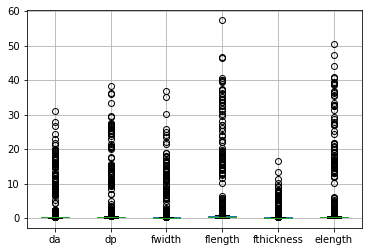

In [ ]:
# outlier detection (from variable 'da' to 'elength')
## problems need group discussion(how do we define outliers)
stone_data_numerical.iloc[:,2:8].boxplot()
print(stone_data_numerical.iloc[:,2:8].describe())

            ewidth       volume         area    perimeter   chull_area  \
count  5299.000000  5299.000000  5299.000000  5299.000000  5299.000000   
mean      0.336963    16.602042     2.214862     1.675445     2.402839   
std       1.629089   236.156080    25.126003     6.891800    27.222648   
min       0.015000     0.000000     0.001000     0.183000     0.001000   
25%       0.100000     0.002000     0.020000     0.623000     0.021000   
50%       0.130000     0.003000     0.029000     0.785000     0.031000   
75%       0.186000     0.007000     0.049000     1.036000     0.052000   
max      34.444000  9202.973000   749.562000   120.170000   802.914000   

       chull_perimeter  
count      5299.000000  
mean          1.632610  
std           6.573565  
min           0.183000  
25%           0.622000  
50%           0.779000  
75%           1.026000  
max         108.846000  


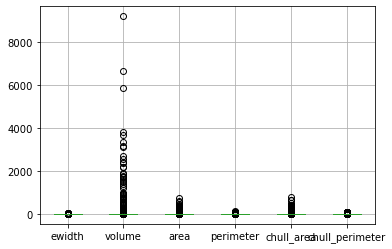

In [ ]:
# outlier detection (from variable 'ewidth' to 'chull_perimeter')
stone_data_numerical.iloc[:,9:15].boxplot()
print(stone_data_numerical.iloc[:,9:15].describe())

         l_t_ratio  t_l_aspect_ratio  compactness    roundness  ellipse_ratio
count  5299.000000       5299.000000  5299.000000  5299.000000    5299.000000
mean      2.962653          0.413635     0.599855     0.376740       0.420723
std       1.638428          0.168698     0.130086     0.156491       0.182279
min       1.084000          0.052000     0.194000     0.037000       0.043000
25%       1.908000          0.284000     0.507000     0.257000       0.280000
50%       2.535000          0.394000     0.601000     0.361000       0.402000
75%       3.524000          0.524000     0.694500     0.482000       0.548500
max      19.069000          0.922000     0.941000     0.885000       1.000000


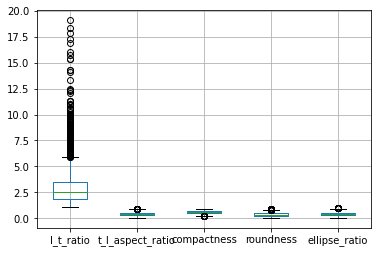

In [ ]:
# outlier detection (from variable 'ewidth' to 'chull_perimeter')
stone_data_numerical.iloc[:,16:21].boxplot()
print(stone_data_numerical.iloc[:,16:21].describe())

          solidity    concavity    convexity       extent    hash  \
count  5299.000000  5299.000000  5299.000000  5299.000000  5299.0   
mean      0.943644     0.056356     0.991046     0.730798     0.0   
std       0.080178     0.080179     0.018609     0.187890     0.0   
min       0.111000     0.000000     0.530000     0.071000     0.0   
25%       0.936000     0.012000     0.991000     0.653000     0.0   
50%       0.971000     0.029000     0.997000     0.711000     0.0   
75%       0.988000     0.064000     0.999000     0.764000     0.0   
max       1.000000     0.889000     1.000000     3.002000     0.0   

       transparency  
count   5299.000000  
mean       0.456355  
std        0.162607  
min        0.000000  
25%        0.424000  
50%        0.512000  
75%        0.551000  
max        0.832000  


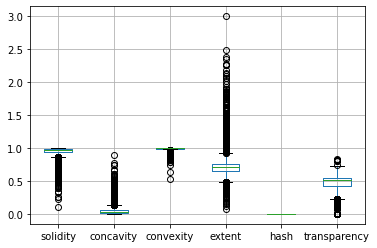

In [ ]:
# outlier detection (from variable 'ewidth' to 'chull_perimeter')
stone_data_numerical.iloc[:,22:28].boxplot()
print(stone_data_numerical.iloc[:,22:28].describe())

       surface_area    l_w_ratio    w_l_ratio    w_t_ratio    t_w_ratio  \
count   5299.000000  5299.000000  5299.000000  5299.000000  5299.000000   
mean       8.859449     2.614261     0.451302     1.175189     0.930623   
std      100.504014     1.261189     0.166853     0.565394     0.179607   
min        0.005000     1.084000     0.055000     1.000000     0.146000   
25%        0.082000     1.756000     0.322000     1.000000     1.000000   
50%        0.117000     2.269000     0.441000     1.000000     1.000000   
75%        0.198000     3.102000     0.569000     1.000000     1.000000   
max     2998.247000    18.300000     0.922000     6.841000     1.000000   

       chull_surface_area  
count         5299.000000  
mean             9.611345  
std            108.890588  
min              0.006000  
25%              0.086000  
50%              0.125000  
75%              0.210000  
max           3211.655000  


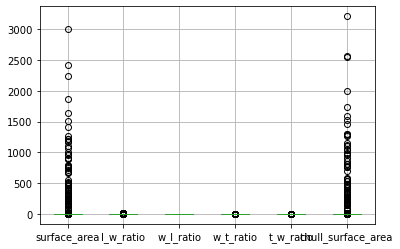

In [ ]:
# outlier detection (from variable 'ewidth' to 'chull_perimeter')
stone_data_numerical.iloc[:,29:35].boxplot()
print(stone_data_numerical.iloc[:,29:35].describe())

        angularity  ellipticity  fiber_length  fiber_width  krumbein_rnd
count  5299.000000  5299.000000   5299.000000  5299.000000   5299.000000
mean     69.491435     3.009928      0.648506     0.193938      0.968601
std      27.561298     1.868712      3.047920     0.937805      0.110638
min       0.000000     1.000000      0.000000     0.000000      0.202000
25%      63.333000     1.824000      0.000000     0.000000      1.000000
50%      70.000000     2.489000      0.272000     0.084000      1.000000
75%      85.000000     3.576500      0.396000     0.126000      1.000000
max     120.000000    23.322000     52.384000    22.823000      1.000000


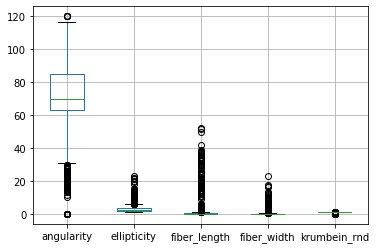

In [ ]:
# outlier detection (from variable 'ewidth' to 'chull_perimeter')
stone_data_numerical.iloc[:,36:41].boxplot()
print(stone_data_numerical.iloc[:,36:41].describe())